<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/SpaceVector_SPWM_FluxLinkage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Space Vector of the Flux Linkage for SPWM Voltage Waveforms</h1></b>

Dr. Bingsen Wang

7/14/2024
</center>

#Space Vector

The space vector is complex variable defined as
$$\underline f = {2\over3}\left(f_a + f_be^{j\frac{2\pi}{3}} + f_ce^{j\frac{4\pi}{3}}\right)\tag{1}$$
where $f_a,f_b,f_c$ are the three-phase variables. In electrical systems, the variable $f$ can be voltage $v$, current $i$, or flux linkage $\lambda$. In power electronics systems, the variable $f$ can be the modulation function or switching function.

#Python Code
The Python code illustrates the space vector of unbalanced three-phase variables that contain the fundamental component and third harmonics.

None
0
0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
0


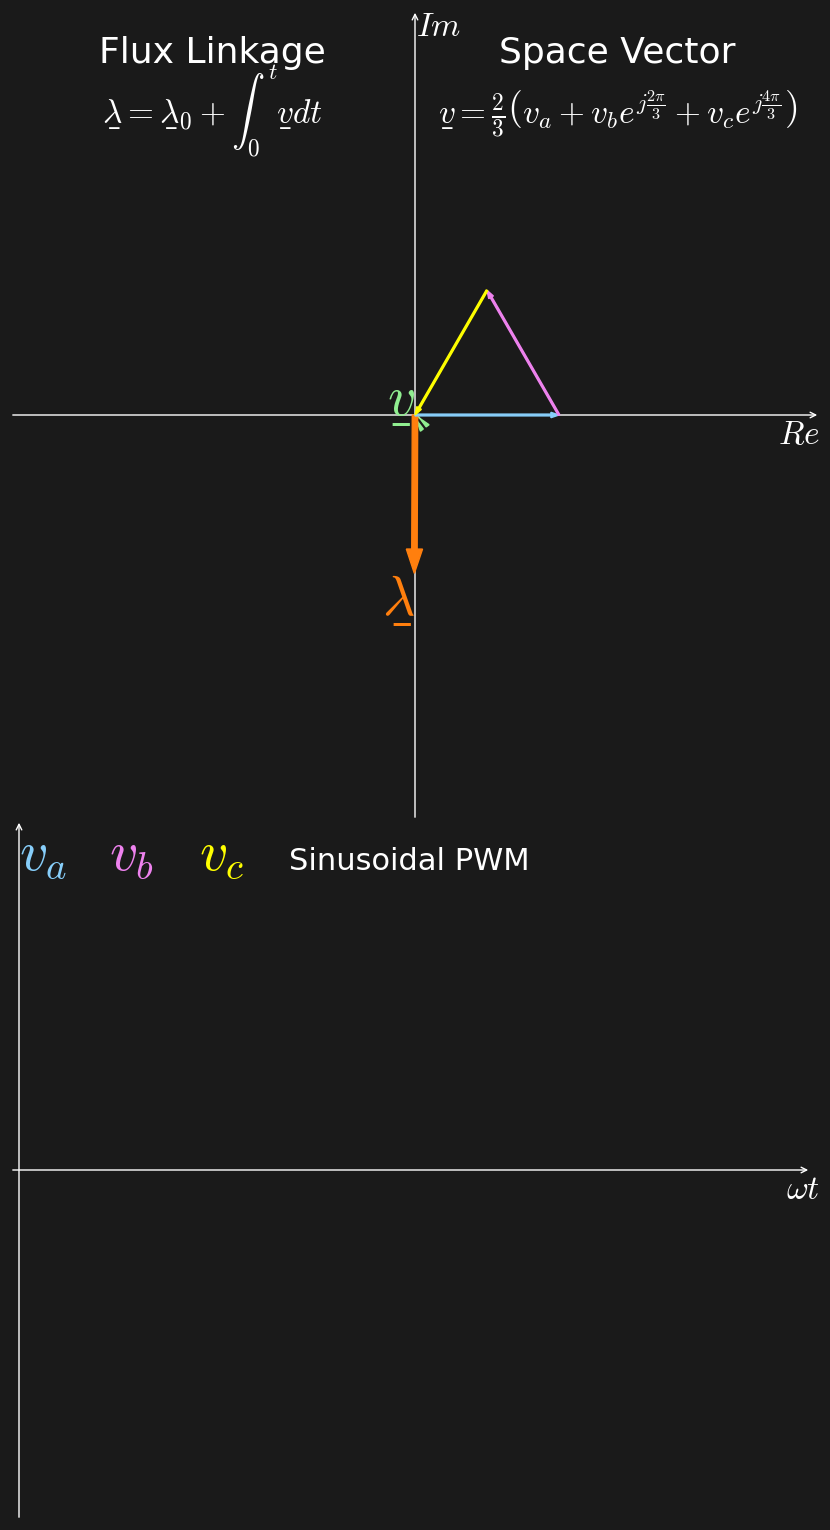

In [16]:
import matplotlib
from os import linesep
from scipy import integrate
import numpy as np
from numpy import linspace,cos,arccos,pi,exp
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib import animation,rc,rcParams
rc('animation', html='jshtml')
plt.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

#carrier
def carrier(t,fs):
  return 2/pi*arccos(cos(2*pi*fs*t))-1

#modulation functions
def mf_abc(t,f,MI,theta):
  mf=[]
  for i in range(3):
    mf.append(MI*cos(2*pi*f*t+theta-i*2*pi/3))
  return np.array(mf)

#PWM voltage waveforms
def vac_abc(t,V,f,MI,theta,fs):
  vac=[]
  for i in range(3):
    vac.append(V*(2*np.heaviside(mf_abc(t,f,MI,theta)[i]-carrier(t,fs),0)-1))
  return np.array(vac)

#integration of space vector
def sv_dt(t1,t2,V,f,MI,theta,fs):
  sv=0
  for i in range(3):
    v_dt = integrate.fixed_quad(lambda x: vac_abc(x,V,f,MI,theta,fs)[i],t1,t2)
    sv += 2/3*v_dt[0]*exp(1j*i*2*pi/3)
  if t1<3/600:
    print(v_dt[1])
  return sv

#parameters
Nf = 600
f = 1/(2*pi) # fundamental frequency in Hz
T = 1/f #fundamental period
fs = 6*f #switching frequency
Ts = 1/fs #switching period

t=linspace(0,T,int(Nf))
wt = 2*pi*f*t
V = 2.4 #voltage
theta=0
MI=0.75 #modulation index
carr= carrier(t,fs) #carrier ranges [-1,1]
vabc_modulation=mf_abc(t,f,MI,theta)
vabc_pwm = vac_abc(t,V,f,MI,theta,fs)
v_sv = 2/3*(vabc_pwm[0]+vabc_pwm[1]*exp(1j*2*pi/3)+vabc_pwm[2]*exp(1j*4*pi/3))
lambda_sv=[0] #flux linkage
for i in range(1,Nf):
  lambda_sv.append(sv_dt(t[i-1],t[i],V,f,MI,theta,fs) + lambda_sv[-1])
lambda_sv=np.array(lambda_sv)
lambda_sv-=np.mean(lambda_sv)

xymax = 4.5
clst=['lightskyblue','violet','yellow','lightgreen','tab:olive','tab:orange','w',(.1,.1,.1)] #colors dark bg
fig = plt.figure(figsize=(9,16),facecolor=clst[-1])
fig.tight_layout()
ax=fig.add_axes((0.05,7/16,.9,.9*9/16),xlim=[-xymax,xymax], ylim=[-xymax,xymax],fc='none') #no fc
ax0=fig.add_axes((0.05,7/16,.9,.9*9/16),xlim=[-xymax,xymax], ylim=[-xymax,xymax],fc='none') #no fc for animated parts
ax1=fig.add_axes((0.05,0,.9,7/16),xlim=[-.1,2*xymax-.1], ylim=[-xymax*7/9,xymax*7/9],fc='none') #no fc
ax.axis('off') #turn off axis frames
ax1.axis('off') #turn off axis frames
ax.annotate("", (xymax, 0), (-xymax, 0),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #x-axis for space vector
ax.annotate("", (0,xymax), (0,-xymax),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #y-axis for space vector
ax1.annotate("", (2*xymax-.2, 0), (-.1, 0),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #x-axis for voltages
ax1.annotate("", (0,xymax*7/9), (0,-xymax*7/9),arrowprops={'arrowstyle':"->",'color':clst[-2]}) #y-axis for voltages
ax.text(xymax,-.03,'$Re$',size=24,va='top',ha='right',color=clst[-2]) #x-axis label
ax.text(0.01,xymax,'$Im$',size=24,va='top',color=clst[-2]) #y label
ax.text(xymax*.5,xymax*.87,'Space Vector',size=26,ha='center',color=clst[-2]) #space vector label
ax.text(xymax*.5,xymax*.72,r'$v\underbar = \frac{2}{3}\left(v_a + v_b e^{j\frac{2\pi}{3}}+ v_c e^{j\frac{4\pi}{3}}\right)$',
        size=24,ha='center',color=clst[-2])
ax.text(-xymax*.5,xymax*.87,'Flux Linkage',size=26,ha='center',color=clst[-2]) #space vector label
ax.text(-xymax*.5,xymax*.72,r'$\lambda\underbar = \lambda\underbar_0+\int_0^t v\underbar dt$',
        size=24,ha='center',color=clst[-2])


lines = [] #array containing all the line plots
lines.append(ax.plot([], [], '-', lw=5, color=clst[4],alpha=.5)[0]) #flux linkage trajectory
for i in range(3):
  lines.append(ax1.plot([], [], '-', lw=3-i*.8, color=clst[i],alpha=1)[0]) #v_a,v_b,v_c PWM
  lines.append(ax1.plot([], [], '--', lw=3-i*.8, color=clst[i],alpha=.8)[0]) #v_a,v_b,v_c modulation
lines.append(ax1.plot([], [], '-', lw=1, color='#CFCFCF')[0]) #carrier

ax1.text(0,xymax*6/9,r'$v_a$',size=40,color=clst[0]) #va label
ax1.text(1,xymax*6/9,r'$v_b$',size=40,color=clst[1]) #vb label
ax1.text(2,xymax*6/9,r'$v_c$',size=40,color=clst[2]) #vc label
text_waveforms=ax1.text(3,xymax*6/9,r'Sinusoidal PWM',size=22, color=clst[-2])
ax1.text(2*xymax-.1,-.03,r'$\omega t$',size=24,va='top',ha='right', color=clst[-2]) #x-axis label

def drawVectors(ax,xymax,lambda_sv,v_sv,vabc,clst):
  theta_v = np.angle(v_sv)
  if theta_v<0:
    theta_v = 2*pi+theta_v
  theta_l = np.angle(lambda_sv)
  if theta_l<0:
    theta_l = 2*pi+theta_l
  ax.clear()
  ax.set_xlim([-xymax,xymax])
  ax.set_ylim([-xymax,xymax])
  ax.axis('off')
  arr = mp.FancyArrow(0,0,v_sv.real, v_sv.imag, width=.04,length_includes_head=True,
                   color=clst[3]) #space vector v_sv
  ax.add_patch(arr)
  arr = mp.FancyArrow(0,0,lambda_sv.real, lambda_sv.imag, width=.06,length_includes_head=True,
                   color=clst[5]) #space vector lambda_sv
  ax.add_patch(arr)
  for i in range(3):
    v=0
    for ii in range(i):
      v+=vabc[ii]*exp(1j*2*pi/3**ii)*2/3
    arr = mp.FancyArrow(v.real,v.imag,(vabc[i]*exp(1j*i*2*pi/3)).real*2/3,
     (vabc[i]*exp(1j*i*2*pi/3)).imag*2/3, width=.02,length_includes_head=True,
     color=clst[i]) #v_a,v_b,v_c
    ax.add_patch(arr)
  t1 = ax.text(v_sv.real,v_sv.imag,r'$v\underbar$', size = 40, color=clst[3])
  if theta_v>pi/2 and theta_v<3*pi/2:
    t1.set_ha('right')
  if theta>pi:
    t1.set_va('top')
  t2 = ax.text(lambda_sv.real,lambda_sv.imag,r'$\lambda\underbar$', size = 40, color=clst[5])
  if theta_l>pi/2 and theta_l<3*pi/2:
    t2.set_ha('right')
  if theta_l>pi:
    t2.set_va('top')
  return

# animation function. This is called sequentially
def animate(i):
  if i%30==0: #for monitoring the progress
    print(i)
  # i=150
  #plot
  lines[0].set_data(lambda_sv[:i+1].real,lambda_sv[:i+1].imag) #flux linkage trajectory
  for k in range(3):
    lines[2*k+1].set_data(t[:i+1]/T*xymax*1.9,vabc_pwm[k][:i+1]) #v_a,v_b,v_c PWM
    lines[2*k+2].set_data(t[:i+1]/T*xymax*1.9,vabc_modulation[k][:i+1]) #v_a,v_b,v_c PWM
  lines[7].set_data(t[:i+1]/T*xymax*1.9,carr[:i+1]) #carrier
  drawVectors(ax0,xymax,lambda_sv[i],v_sv[i],vabc_pwm[:,i],clst)
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
fn = r"SpaceVector_Integration.mp4"
writervideo = animation.FFMpegWriter(fps=20)
anim.save(fn, writer=writervideo,dpi = 200)